<a href="https://colab.research.google.com/github/pkpk1717/MNIST-digit-recognition-using-Keras/blob/master/1st_DNN_completed_99_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


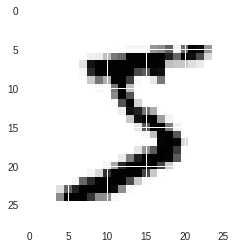

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
Y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

# model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1)))
# # model.add(Convolution2D(10, 1, activation='relu'))
# # model.add(Convolution2D(10, 26))
# model.add(Convolution2D(256,3,3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(512,3,3, activation='relu'))
# model.add(Convolution2D(1024,3,3, activation='relu'))
# model.add(Convolution2D(10,1,activation='relu'))
# model.add(Convolution2D(10,8))
# model.add(Flatten())
# model.add(Activation('softmax'))
model.add(Convolution2D(128, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Convolution2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(512, (3, 3), activation = 'relu'))
model.add(Convolution2D(1024, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(1024, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 512)       1180160   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 1024)        4719616   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 1024)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=120, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2005 - acc: 0.9342
Epoch 2/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0560 - acc: 0.9840
Epoch 3/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0421 - acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0349 - acc: 0.9902
Epoch 5/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0297 - acc: 0.9920
Epoch 6/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0264 - acc: 0.9923
Epoch 7/20
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0227 - acc: 0.9934
Epoch 8/20
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0236 - acc: 0.9932
Epoch 9/20
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0198 - acc: 0.9939
Epoch 10/20
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0212 - acc: 0.9937

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.026724383246578463, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[6.98824980e-28 4.88527390e-19 9.27599305e-20 1.63673013e-19
  1.09655979e-16 3.04761025e-21 8.29678056e-30 1.00000000e+00
  3.27897626e-21 1.30416000e-17]
 [1.60267005e-17 2.83293734e-13 1.00000000e+00 5.38984376e-16
  1.96798940e-17 3.78000214e-20 4.63106929e-14 2.35288297e-13
  1.66167681e-16 1.07341946e-17]
 [2.21296635e-16 1.00000000e+00 9.57351472e-12 1.94506995e-16
  2.87624362e-13 3.79417336e-13 7.79744325e-13 1.18176931e-12
  4.25991138e-13 5.64112466e-15]
 [1.00000000e+00 2.64417243e-16 1.52858090e-14 9.22118117e-17
  6.36944848e-15 9.61379820e-14 9.70457048e-10 1.76207748e-16
  1.70592625e-13 7.64527504e-12]
 [1.72230555e-21 2.12551850e-17 9.88683297e-20 2.04185617e-23
  1.00000000e+00 3.17321736e-17 1.09831448e-15 1.40767228e-16
  3.09891901e-16 2.76209351e-12]
 [1.05255748e-24 1.00000000e+00 4.99784718e-18 5.74016856e-25
  1.59430915e-18 1.08532610e-19 2.96671041e-19 5.28822873e-19
  1.19238861e-19 5.14842636e-22]
 [6.54354128e-16 4.62603761e-10 1.64158726e-13 5.14329655e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

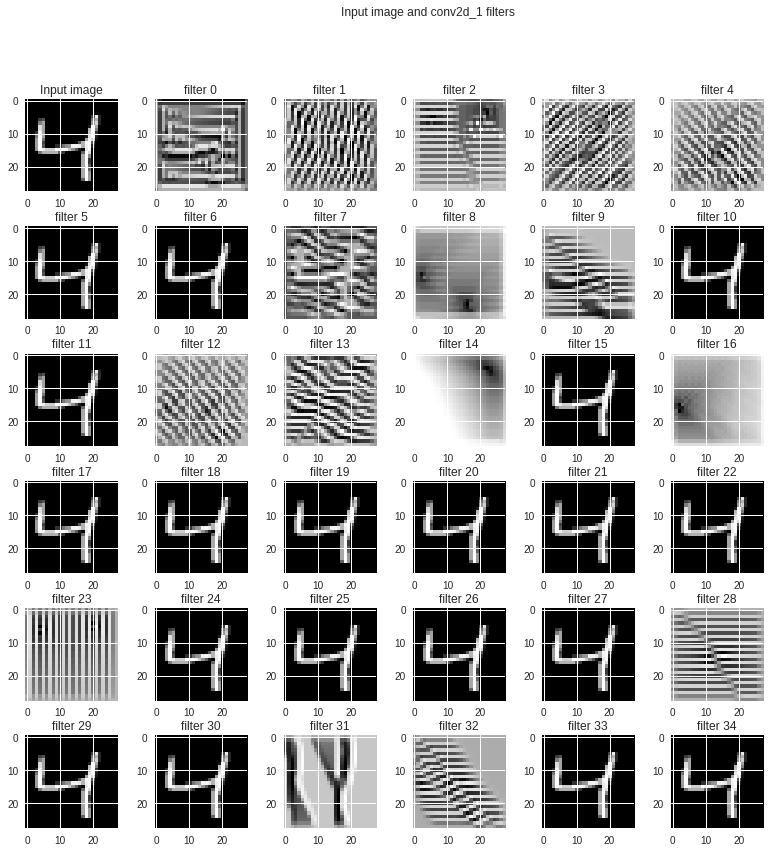

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28,28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()